In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

### Curso-Taller 2019: Aprendizaje Automático e Imágenes en Python 
* Docentes:  Dra. Valeria S. Rulloni - Dra. Laura M. Vargas
* Ayudantes: Axel Aguerreberry - Sebastián Palacio
* Colaboradoras: Dra. Ana Carolina Maldonado - Dra. Claudia Egea

### Temario a desarrollar:
*	Uso y herramientas básicas de Python
*	Imágenes digitales: tipos (binarias, monocromáticas y a color)
*	Histograma. Mejora de la imagen: contraste, filtros: suavizado y detección de bordes.
*	Umbralado y Binarización. Operaciones Morfológicas: erosión, dilatación, cierre y apertura.
*	**Clasificación de imágenes.**
*	**Aprendizaje automático**
*	**Aprendizaje profundo: Redes neuronales**
*	Aplicaciones: Grafos para segmentación de imágenes, entre otras.



# Laboratorio Parte 2: Keras, MNIST data y redes neuronales convolucionales (CNN)

In [2]:
# importo librerias necesarias
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

from tensorflow.examples.tutorials.mnist import input_data
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint, Callback

Using TensorFlow backend.


In [3]:
sns.set_style("white")

In [4]:
print(tf.__version__)
print(keras.__version__)

1.15.0
2.2.5


In [5]:
# importo y guardo MNIST data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


## Exploración del dataset

In [6]:
X_train = mnist.train.images
y_train = mnist.train.labels

X_val = mnist.validation.images
y_val = mnist.validation.labels

X_test = mnist.test.images
y_test = mnist.test.labels

In [7]:
# Dimensiones de la data
print(f"Imagenes de Entrenamiento: {X_train.shape}")
print(f"Labels de Entrenamiento  : {y_val.shape}")
print()
print(f"Imagenes de Validacion   : {X_val.shape}")
print(f"Labels de Validacion     : {y_val.shape}")
print()
print(f"Imagenes de Testeo       : {X_test.shape}")
print(f"Labels de Testeo         : {y_test.shape}")

Imagenes de Entrenamiento: (55000, 784)
Labels de Entrenamiento  : (5000, 10)

Imagenes de Validacion   : (5000, 784)
Labels de Validacion     : (5000, 10)

Imagenes de Testeo       : (10000, 784)
Labels de Testeo         : (10000, 10)


In [8]:
##### Some Constants #####
IMG_ROWS = 28
IMG_COLS = 28
NUM_CLASSES = 10

BATCH_SIZE = 32
NUM_EPOCHS = 10

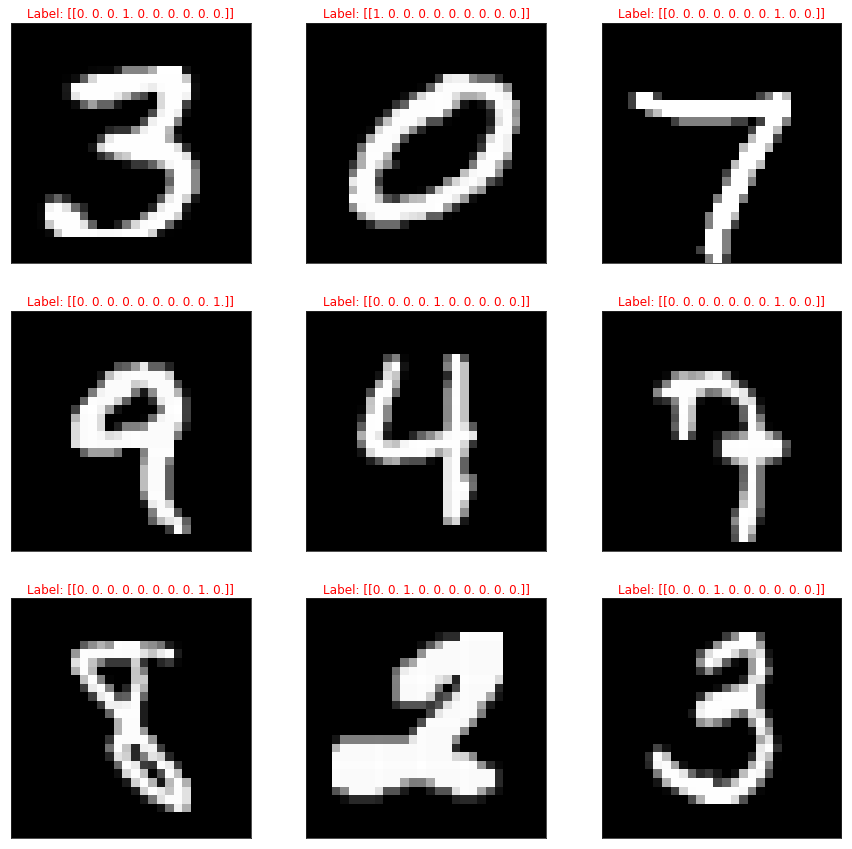

In [9]:
# Visualizamos algunas imagenes
fig, ax = plt.subplots(3, 3, figsize=[15, 15])

for j in range(3):
    for i in range(3):
        random_image = np.random.randint(low=0, high=55000, size=1)

        ax[i,j].imshow(X_train[random_image].reshape(28, 28), 'gray')
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        ax[i,j].set_title(f'Label: {y_train[random_image]}', color='r')

# fig.subplots_adjust(wspace=0.1, hspace=0)
plt.show()

# Definición y entrenamiento del Modelo

In [10]:
X_train = X_train.reshape(55000, 28, 28, 1)
X_val = X_val.reshape(5000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

### Documentación de Keras: https://keras.io/

In [11]:
### A completar: definir capa de entrada, capas ocultas, y capa de salida
### Utilizar funciones Input(), Dense()

inputs = Input(shape=(IMG_ROWS, IMG_COLS, 1))

conv1 = Conv2D(64, 5, activation="relu")(inputs)
maxPool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

conv2 = Conv2D(128, 5, activation="relu")(maxPool1)
maxPool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

flatten = Flatten()(maxPool2)

dense1 = Dense(256, activation="sigmoid")(flatten)
dense2 = Dense(64, activation="sigmoid")(dense1)

outputs = Dense(NUM_CLASSES, activation="softmax")(dense2)

In [12]:
### A completar: definir entrada y salida del modelo
model = Model(
    inputs=inputs,
    outputs=outputs
)

In [13]:
### A completar: definir optimizador y funcion de costo
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         204928    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               5245

In [15]:
## para guardar el modelo
filepath = "prueba2.h5"
model_checkpoint = ModelCheckpoint(
    filepath,
    monitor='loss',
    verbose=1,
    save_best_only=True
)

In [16]:
%%time
history = model.fit(
    X_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    validation_data=(X_val, y_val),
    callbacks=[model_checkpoint]
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 55000 samples, validate on 5000 samples
Epoch 1/10





55000/55000 [==============================] - 100s 2ms/step - loss: 0.1690 - acc: 0.9597 - val_loss: 0.0452 - val_acc: 0.9866

Epoch 00001: loss improved from inf to 0.16897, saving model to prueba2.h5
Epoch 2/10
55000/55000 [==============================] - 99s 2ms/step - loss: 0.0396 - acc: 0.9883 - val_loss: 0.0496 - val_acc: 0.9856

Epoch 00002: loss improved from 0.16897 to 0.03963, saving model to prueba2.h5
Epoch 3/10
55000/55000 [==============================] - 99s 2ms/step - loss: 0.0279 - acc: 0.9916 - val_loss: 0.0373 - val_acc: 0.9892

Epoch 00003: loss improved from 0.03963 to 0.02795, saving model to prueba2.h5
Epoch 4/10
55000/55000 [==============================] - 99s 2ms/step - loss: 0.0212 - acc: 0.9936 - val_loss: 0.0338 - val_acc: 0.9908

Epoch 00004: loss improved from 0.02795 to 0.02116, saving mode

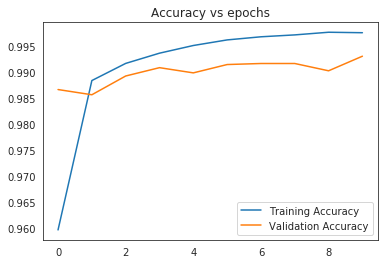

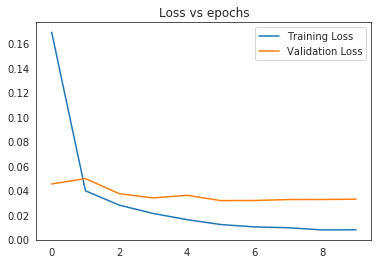

In [17]:
## Visualizamos curvas de entrenamiento

plt.figure()
plt.title("Accuracy vs epochs")
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])


plt.figure()
plt.title("Loss vs epochs")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'])

In [18]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss    : {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

10000/10000 [==============================] - 3s 344us/step
Test loss    : 0.02663917155387462
Test accuracy: 0.9936


## Usemos este modelo para hacer predicciones

In [19]:
## A completar: utilizar imagenes de testeo

predictions = model.predict(X_test)

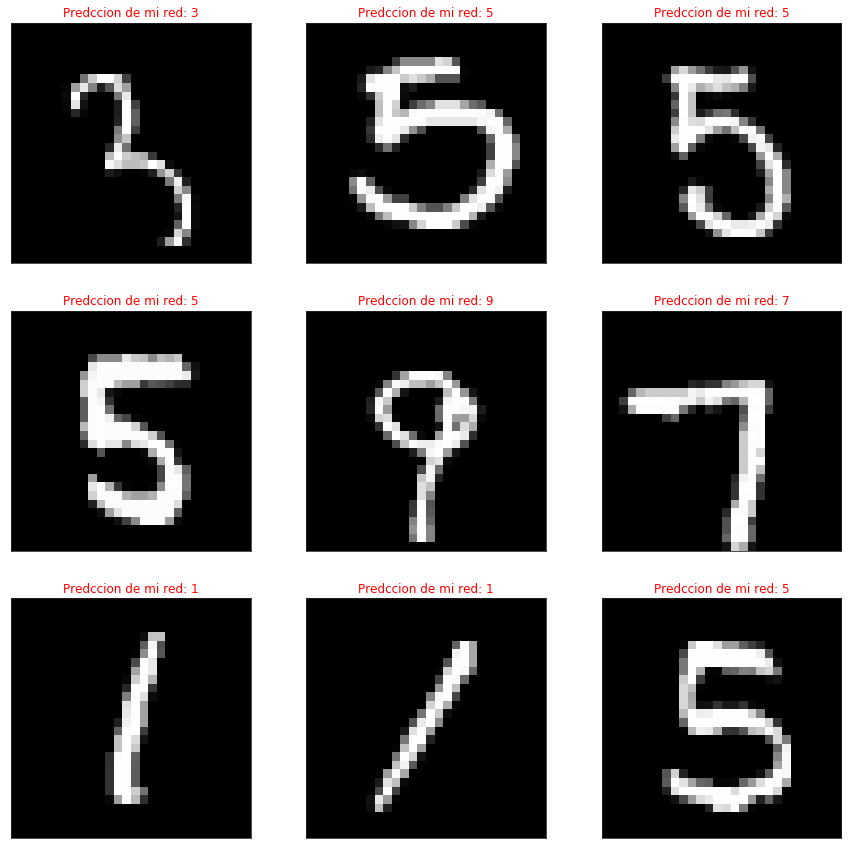

In [20]:
fig, ax = plt.subplots(3, 3, figsize=[15, 15])

for j in range(3):
    for i in range(3):
        random_image = np.random.randint(low=0, high=1000, size=1)

        ax[i,j].imshow(X_test[random_image].reshape(28,28), 'gray')
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        ax[i,j].set_title(f'Predccion de mi red: {np.argmax(predictions[random_image])}', color='r')

plt.show()